In [2]:
import os
import shutil

path1 = 'images_001/images'
path2 = 'images_002/images'
path3 = 'images_003/images'
path4 = 'images_004/images'
path5 = 'images_005/images'
path6 = 'images_006/images'
path7 = 'images_007/images'
path8 = 'images_008/images'
path9 = 'images_009/images'
path010 = 'images_010/images'
path011 = 'images_011/images'
path012 = 'images_012/images'
dest_path = 'sample_data'
for path in [path1, path2, path3, path4, path5,path6 , path7,path8,path9,path010,path011,path012]:
    for file_name in os.listdir(path):
        src_path = os.path.join(path, file_name)
        shutil.move(src_path, dest_path)

In [3]:
import pandas as pd
import numpy as np
import cv2

df_labels = pd.read_csv('Data_Entry_2017.csv')
img = cv2.imread(os.path.join('sample_data', file_name))

# Filter the DataFrame to only include the two labels you want to extract
label1 = 'Cardiomegaly'
label2 = 'Effusion'
df_filtered = df_labels[(df_labels['Finding Labels'] == label1) | (df_labels['Finding Labels'] == label2)]

# Extract the filenames of the images from the filtered DataFrame
image_files = df_filtered['Image Index'].values

# Loop through the image files and save the images with the corresponding label to a new directory
output_dir = 'Finaldataset/'
os.makedirs(output_dir, exist_ok=True)

for filename in image_files:
    label = df_filtered[df_filtered['Image Index'] == filename]['Finding Labels'].values[0]
    output_filename = os.path.join(output_dir, f'{label}_{os.path.basename(filename)}')
    cv2.imwrite(output_filename, img)

In [4]:
df_filtered.shape

(5048, 12)

In [5]:
df_filtered['Finding Labels'].unique()

array(['Cardiomegaly', 'Effusion'], dtype=object)

In [6]:
df_filtered['Finding Labels'].value_counts(normalize=True)

Effusion        0.783479
Cardiomegaly    0.216521
Name: Finding Labels, dtype: float64

In [9]:
df_filtered.loc[:, 'Finding Labels'] = df_filtered['Finding Labels'].replace(['Effusion', 'Cardiomegaly'], [2, 1])
df_filtered.loc[:, 'df_filteredFinding Labels'] = df_filtered['Finding Labels']

C:\Users\dell\AppData\Local\Temp\ipykernel_42936\2308808266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Finding Labels'] = df_filtered['Finding Labels'].replace(['Effusion', 'Cardiomegaly'], [2, 1])
C:\Users\dell\AppData\Local\Temp\ipykernel_42936\2308808266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'df_filteredFinding Labels'] = df_filtered['Finding Labels']


In [6]:
df_filtered['Finding Labels'].value_counts(normalize=True)

NameError: name 'df_filtered' is not defined

In [4]:
Datadirectory="Finaldataset/"

In [7]:
# TRAINING MODEL BASED ON CNN
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
classes=["1","2"]

In [9]:
for category in classes :
    path =os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
        break

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [16]:
training_Data = []

def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass

In [17]:
print(len(training_Data))

0


In [18]:
train_dir = 'training_1/'
test_dir = 'testing_1/'

In [28]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
from skimage.io import imread_collection
from skimage.transform import resize
from sklearn.svm import SVC
import pickle
import random

In [10]:
dir='B:\\project_final\\Finaldataset'

In [12]:
categories=['1','2']

In [19]:
data=[]

In [20]:
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath =os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
print(len(data))

5048


In [22]:
pick_in=open('data1.picle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [23]:
pick_in=open('data1.picle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [26]:
random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(features,labels,test_size=0.25)


model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

# prediction=model.predict(xtest)
# accuracy = mdel.score(xtest,ytest)
# categories=['1','2']
# print('accuracy:',accuracy)
# print('prediction is: ',categories[prediction[0]])

# mypet=xtest[0].reshape(50,50)
# plt.imshow(mypet,cmap='gray')
# plt.show()

accuracy: 0.7939778129952456
prediction is:  2


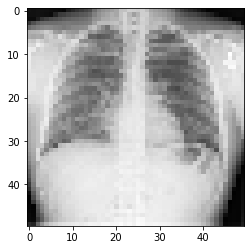

In [37]:
pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories=['1','2']
print('accuracy:',accuracy)
print('prediction is: ',categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

In [2]:
# set up paths to the image folders
cardiomegaly_path = "Finaldataset/1/*.jpg"
effusion_path = "finaldataset/2/*.jpg"

In [3]:
# read images from folders and resize them to 256x256
cardiomegaly = imread_collection(cardiomegaly_path)
effusion = imread_collection(effusion_path)

In [4]:
cardiomegaly_resized = [resize(img, (256, 256)) for img in cardiomegaly]
effusion_resized = [resize(img, (256, 256)) for img in effusion]

In [5]:
# create data and label arrays
data = np.concatenate([cardiomegaly_resized, effusion_resized])
labels = np.concatenate([np.zeros(len(cardiomegaly_resized)), np.ones(len(effusion_resized))])


In [6]:
# create data and label arrays
data = np.concatenate([cardiomegaly_resized, effusion_resized])
labels = np.concatenate([np.zeros(len(cardiomegaly_resized)), np.ones(len(effusion_resized))])



In [8]:
from sklearn.model_selection import train_test_split

# Assuming that X contains the input data and y contains the target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'X' is not defined